In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [2]:
wine=pd.read_csv('winequality-red.csv')

In [3]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Let's do some plotting to know how the data columns are distributed

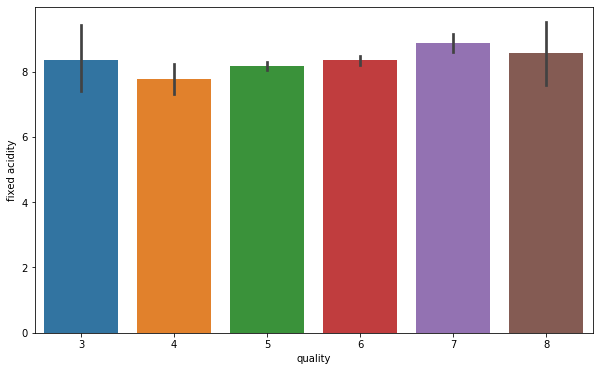

In [6]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine)

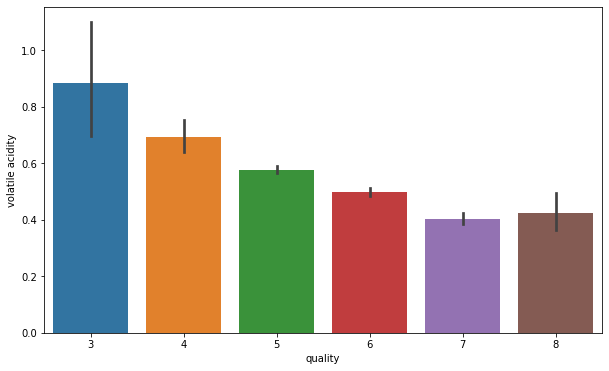

In [7]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=wine)

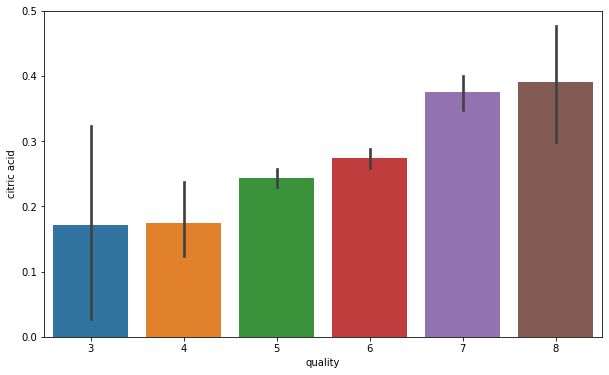

In [8]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=wine)

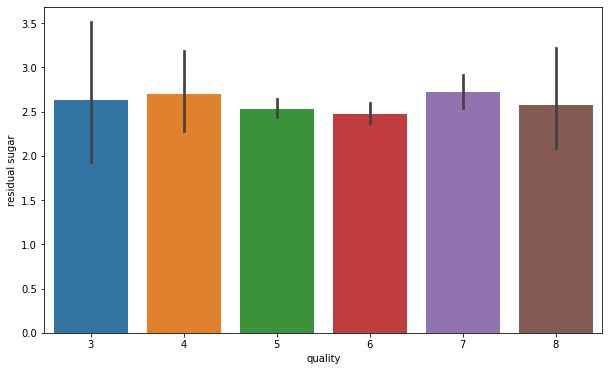

In [9]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=wine)

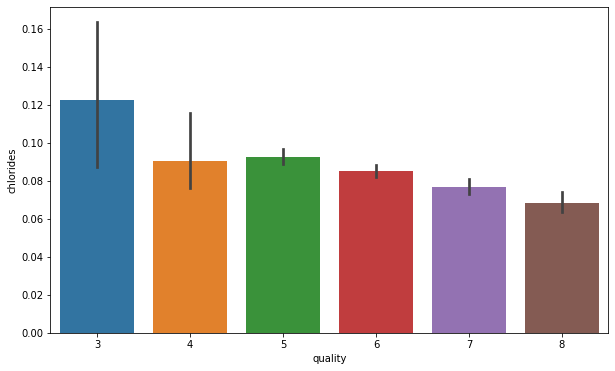

In [10]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine)

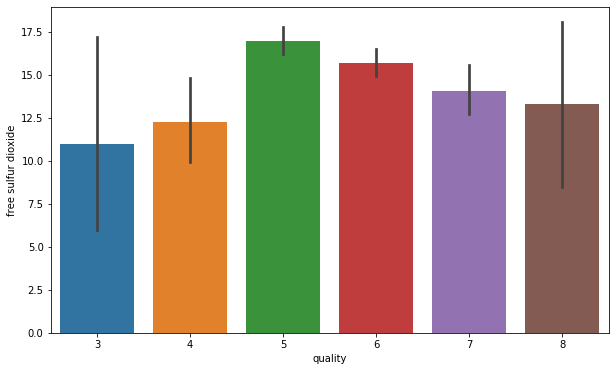

In [11]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

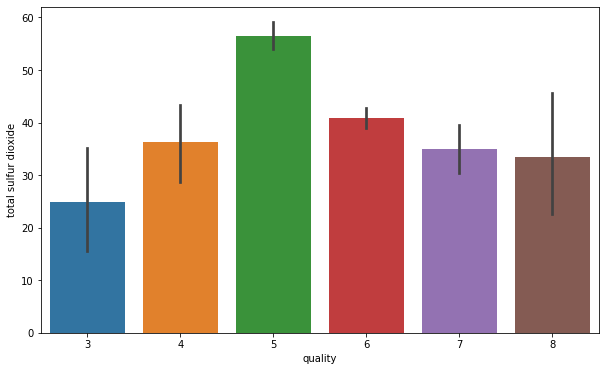

In [12]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

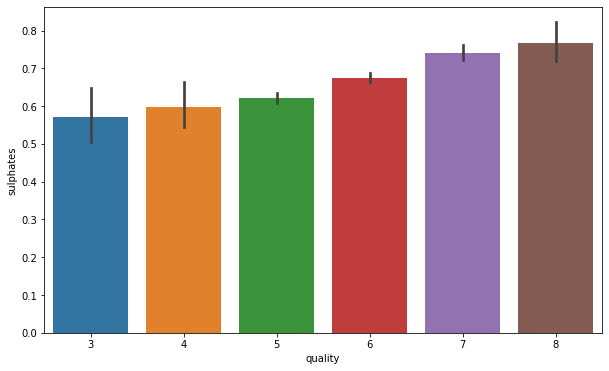

In [13]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=wine)

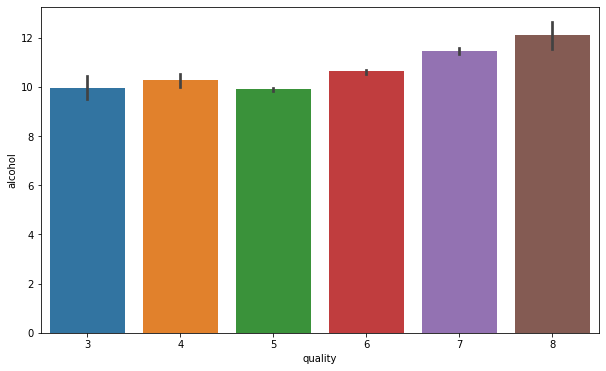

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Preprocessing Data

In [15]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)

In [16]:
label_quality=LabelEncoder()

In [17]:
wine['quality']=label_quality.fit_transform(wine['quality'])


In [18]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

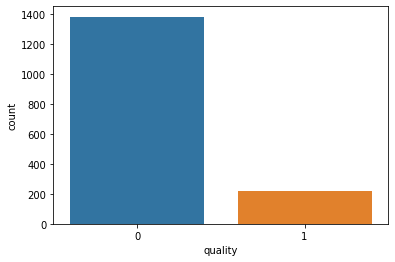

In [19]:
sns.countplot(wine['quality'])

In [20]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
sc=StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Machine Learning Algo...

Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



Random Forest gives the accuracy of 88%

In [26]:
print(confusion_matrix(y_test,pred_rfc))

[[265   8]
 [ 28  19]]


Stochastic Gradient Decent Classifier

In [27]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [28]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       273
           1       0.59      0.49      0.53        47

    accuracy                           0.88       320
   macro avg       0.75      0.72      0.73       320
weighted avg       0.87      0.88      0.87       320



Stochastic Gradient Decent Classifier gives the accuracy of 85%

In [29]:
print(confusion_matrix(y_test, pred_sgd))

[[257  16]
 [ 24  23]]


Support Vector Classifier

In [30]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [31]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support Vector Machine give the accuracy of 88%

# Let's try to increase our accuracy of models


Grid Search Cv

In [32]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [33]:
grid_svc.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [35]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 88% to 90% using GridSearchCV

#Cross validation Score For random search and SGD

In [36]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9132320374015748